In [2]:
import sys, os; sys.path.append(os.path.abspath(os.path.join(os.pardir, "src")))

import numpy as np
import h5py

import lib.analysis as als 
import lib.plot as plot

import importlib
importlib.reload(plot)
importlib.reload(als)

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook, cm
from matplotlib.colors import LightSource
%matplotlib inline

In [3]:
data = {}
with h5py.File(os.path.join(os.pardir, "embeddings/prott5/per-residue.h5"), "r") as file:
    print("Groups/Directories in the file:", list(file.keys()))
    
    # Access a specific dataset within a group. For example: '/group/dataset'
    for key, val in file.items():
        dataset = file[key]
        # Read data from the dataset and store in external list
        data[key] = dataset[:]    

Groups/Directories in the file: ['A0A663DJA2', 'P0DTC1', 'P0DTC2', 'P0DTC3', 'P0DTC4', 'P0DTC5', 'P0DTC6', 'P0DTC7', 'P0DTC8', 'P0DTC9', 'P0DTD1', 'P0DTD2', 'P0DTD3', 'P0DTD8', 'P0DTF1', 'P0DTG0', 'P0DTG1']


In [4]:
embeddings1 = data['A0A663DJA2']

In [5]:
embeddings2 = np.fromfile(os.path.join(os.pardir, "embeddings/esm/ORF10.txt"), sep=' ').reshape(38, 1024)

In [6]:
embeddings1.shape

(38, 1024)

In [7]:
embeddings2.shape

(38, 1024)

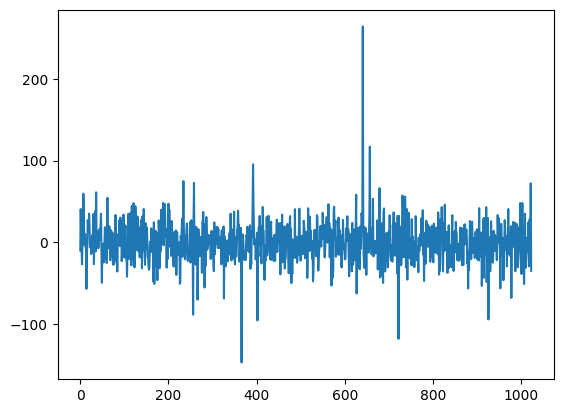

In [42]:
plt.plot(np.arange(0, embeddings2.shape[1]), als.remove_min_max(embeddings2[2]))
plt.show()

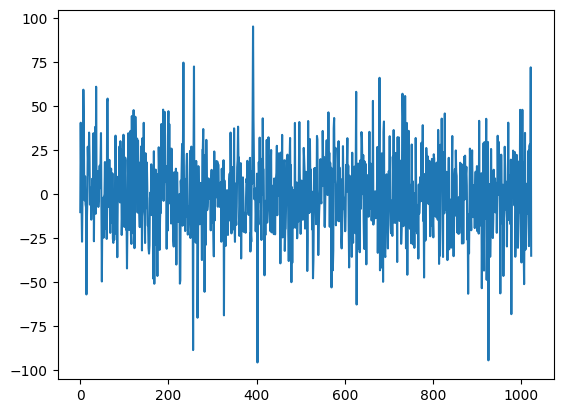

In [32]:
plt.plot(np.arange(0, embeddings2.shape[1]), als.remove_min_max(embeddings2[2], iterations=3))
plt.show()

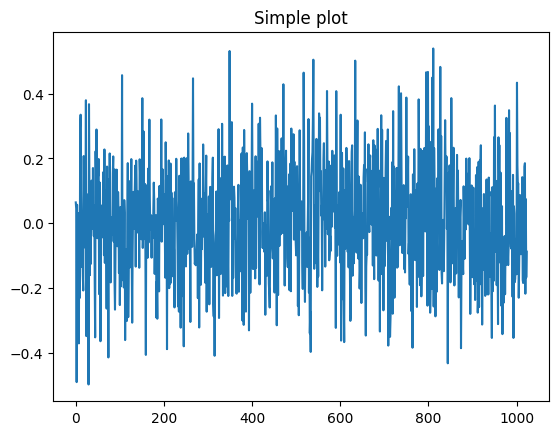

In [30]:
plot.simple_plot(embeddings1[2])

In [10]:
autocorr_set1 = np.array([als.autocorr(e, normalize=True) for e in embeddings1.T]).squeeze(-2)

In [11]:
autocorr_set2 = np.array([als.autocorr(e, normalize=True) for e in embeddings2.T]).squeeze(-2)

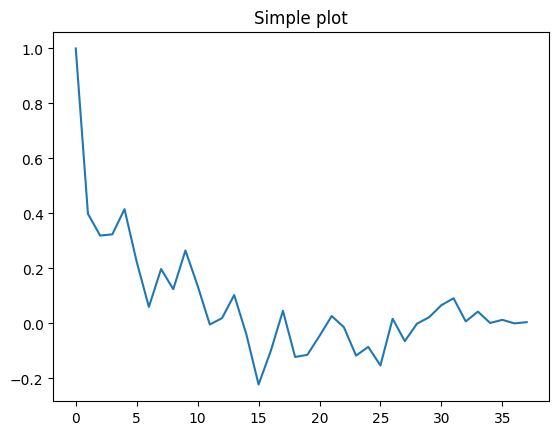

In [35]:
plot.simple_plot(als.autocorr(embeddings1[:, 35], normalize=True)[0])

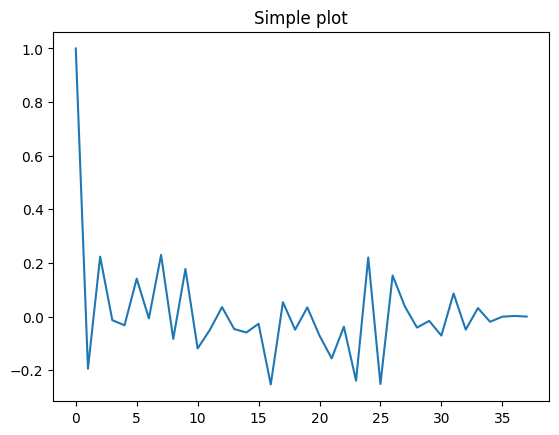

In [36]:
plot.simple_plot(als.autocorr(embeddings2[:, 35], normalize=True)[0])

(20, 38)


<Figure size 640x480 with 0 Axes>

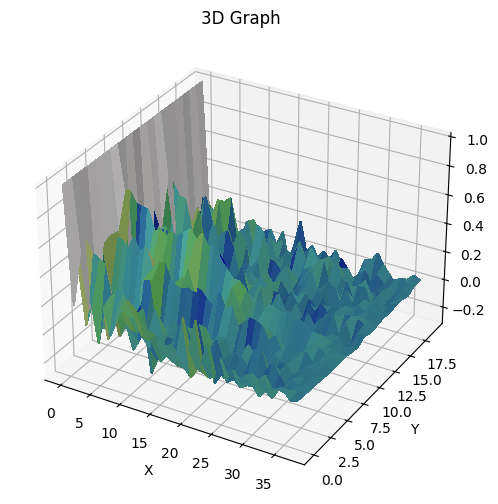

In [37]:
plot.graph_3d(autocorr_set1[0:20])

(20, 38)


<Figure size 640x480 with 0 Axes>

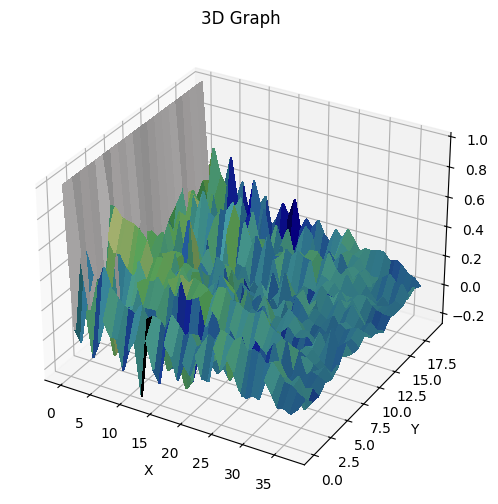

In [38]:
plot.graph_3d(autocorr_set2[0:20])

In [16]:
prot_corr = als.protein_correlation(embeddings1.T, embeddings2.T)

In [23]:
prot_corr[50:100].shape

(50, 1)

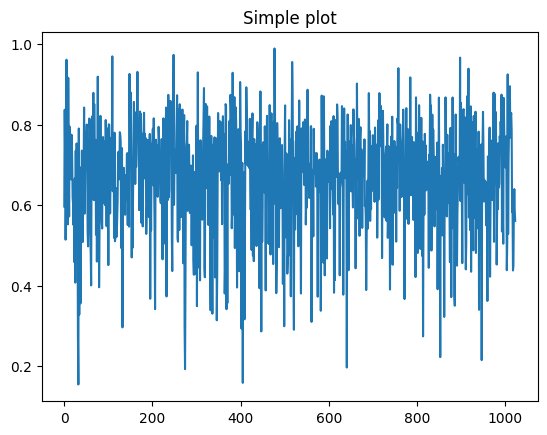

In [25]:
plot.simple_plot(prot_corr.reshape(-1))

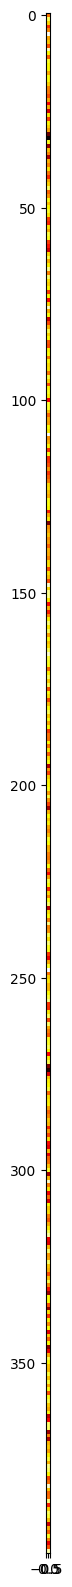

In [39]:
plot.corr_heatmap(prot_corr[:400], scale=4)

In [47]:
a = np.array([[[1, 2], [4, 5]], [[2, 3], [5, 6]], [[3, 4], [6, 7]]])
a

array([[[1, 2],
        [4, 5]],

       [[2, 3],
        [5, 6]],

       [[3, 4],
        [6, 7]]])

In [48]:
np.mean(a, axis=0)

array([[2., 3.],
       [5., 6.]])